In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Знаходження потрібної таблиці. Замініть у таблиці значення "—" на значення NaN

In [38]:
# load tables
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url, attrs={"class": "wikitable collapsible collapsed"})
# find current table
birth_rate_table = tables[3]

# Transform numeric values, dividing them by 10, starting from the second column because first column is cities
for col in birth_rate_table.columns[1:]:

    birth_rate_table[col] = pd.to_numeric(birth_rate_table[col], errors='coerce')

    birth_rate_table[col] = birth_rate_table[col] / 10
    
birth_rate_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Вивести перші рядки таблиці за допомогою методу head

In [39]:
birth_rate_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [40]:
rows, columns = birth_rate_table.shape
print(f'rows = {rows}\ncolumn = {columns}')

rows = 28
column = 9


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [41]:
colums_types = birth_rate_table.dtypes
colums_types

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [42]:
missing_data = birth_rate_table.isnull().sum()
missing_data

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—". Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [43]:
pd.set_option('future.no_silent_downcasting', True) # close warning

row_means = birth_rate_table.iloc[:, 1:].mean(axis=1)


for i in range(len(birth_rate_table)):
    row_mean = row_means[i]

    birth_rate_table.iloc[i, 1:] = birth_rate_table.iloc[i, 1:].fillna(row_mean)

birth_rate_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.6,16.0,13.0,7.3,12.6,15.416667,15.416667
1,Вінницька,22.400000,19.2,14.2,12.4,8.4,11.2,10.900000,7.600000
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.100000,10.100000
3,Дніпропетровська,20.400000,20.4,15.1,12.3,7.1,11.2,11.100000,7.100000
4,Донецька,27.100000,21.4,14.0,10.9,6.1,9.8,8.200000,13.928571
5,Житомирська,26.100000,22.3,15.9,12.9,8.9,12.2,12.000000,7.900000
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.600000,10.400000
7,Запорізька,21.900000,19.7,15.0,12.4,7.1,10.6,10.600000,6.800000
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.200000,8.800000
9,Київська,20.400000,18.9,15.6,12.3,7.3,12.2,12.100000,8.000000


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [44]:
regions = birth_rate_table['Регіон']
average_ua = birth_rate_table.iloc[-1][1:].mean()
brate_2019 = birth_rate_table['2019']
filtered_regions = birth_rate_table.loc[brate_2019 > average_ua, 'Регіон']
filtered_regions

0          Крим
4      Донецька
11    Луганська
Name: Регіон, dtype: object

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [45]:
birth_rate_table = birth_rate_table.iloc[:-1]
birth_rate_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.6,16.0,13.0,7.3,12.6,15.416667,15.416667
1,Вінницька,22.400000,19.2,14.2,12.4,8.4,11.2,10.900000,7.600000
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.100000,10.100000
3,Дніпропетровська,20.400000,20.4,15.1,12.3,7.1,11.2,11.100000,7.100000
4,Донецька,27.100000,21.4,14.0,10.9,6.1,9.8,8.200000,13.928571
5,Житомирська,26.100000,22.3,15.9,12.9,8.9,12.2,12.000000,7.900000
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.600000,10.400000
7,Запорізька,21.900000,19.7,15.0,12.4,7.1,10.6,10.600000,6.800000
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.200000,8.800000
9,Київська,20.400000,18.9,15.6,12.3,7.3,12.2,12.100000,8.000000


У якому регіоні була найвища народжуваність у 2014 році?

In [46]:
max_birth_rate_2014 = birth_rate_table['2014'].max()
region_max_birth_rate_2014 = birth_rate_table.loc[birth_rate_table['2014'] == max_birth_rate_2014, 'Регіон']
region_max_birth_rate_2014

0    Крим
Name: Регіон, dtype: object

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

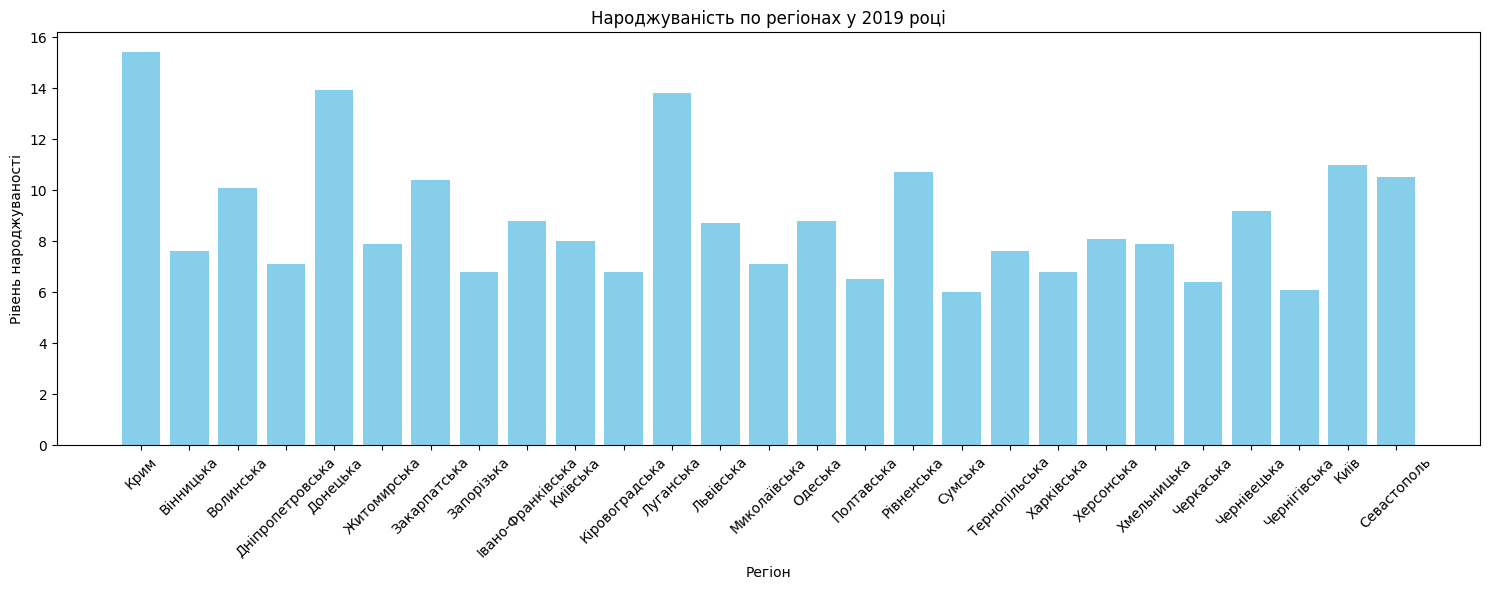

In [47]:
%matplotlib inline
data_2019 = birth_rate_table[['Регіон', '2019']].dropna()

plt.figure(figsize=(15, 6))
plt.bar(data_2019['Регіон'], data_2019['2019'], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

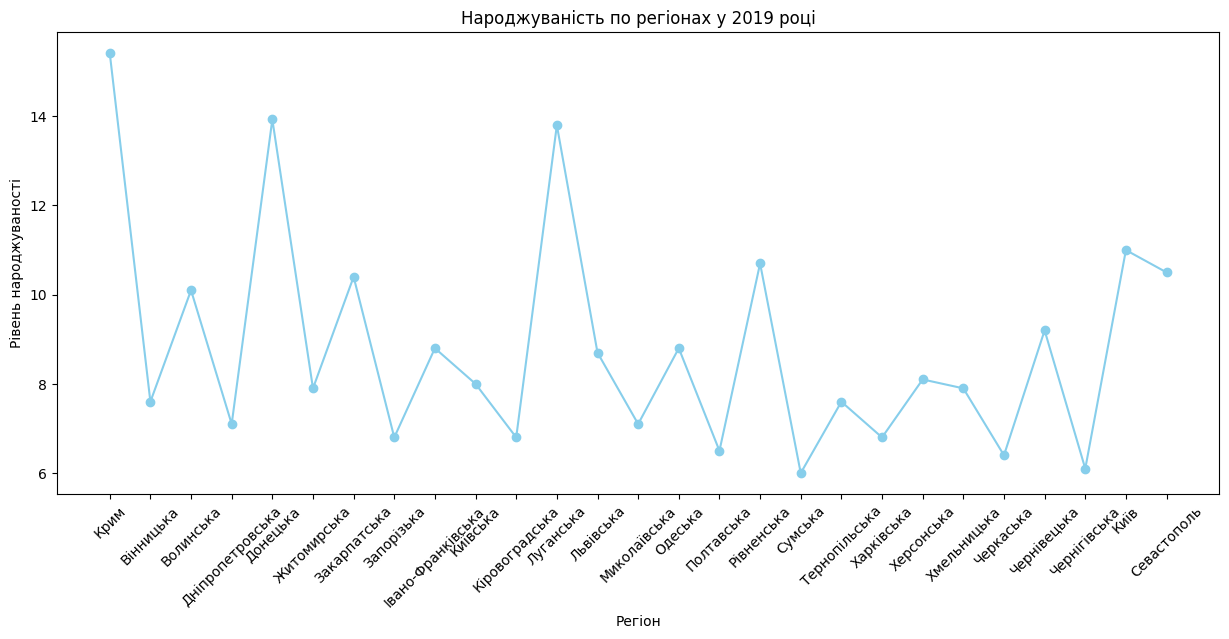

In [48]:
%matplotlib inline
plt.figure(figsize=(15, 6))
plt.plot(data_2019['Регіон'], data_2019['2019'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=45)
plt.show()

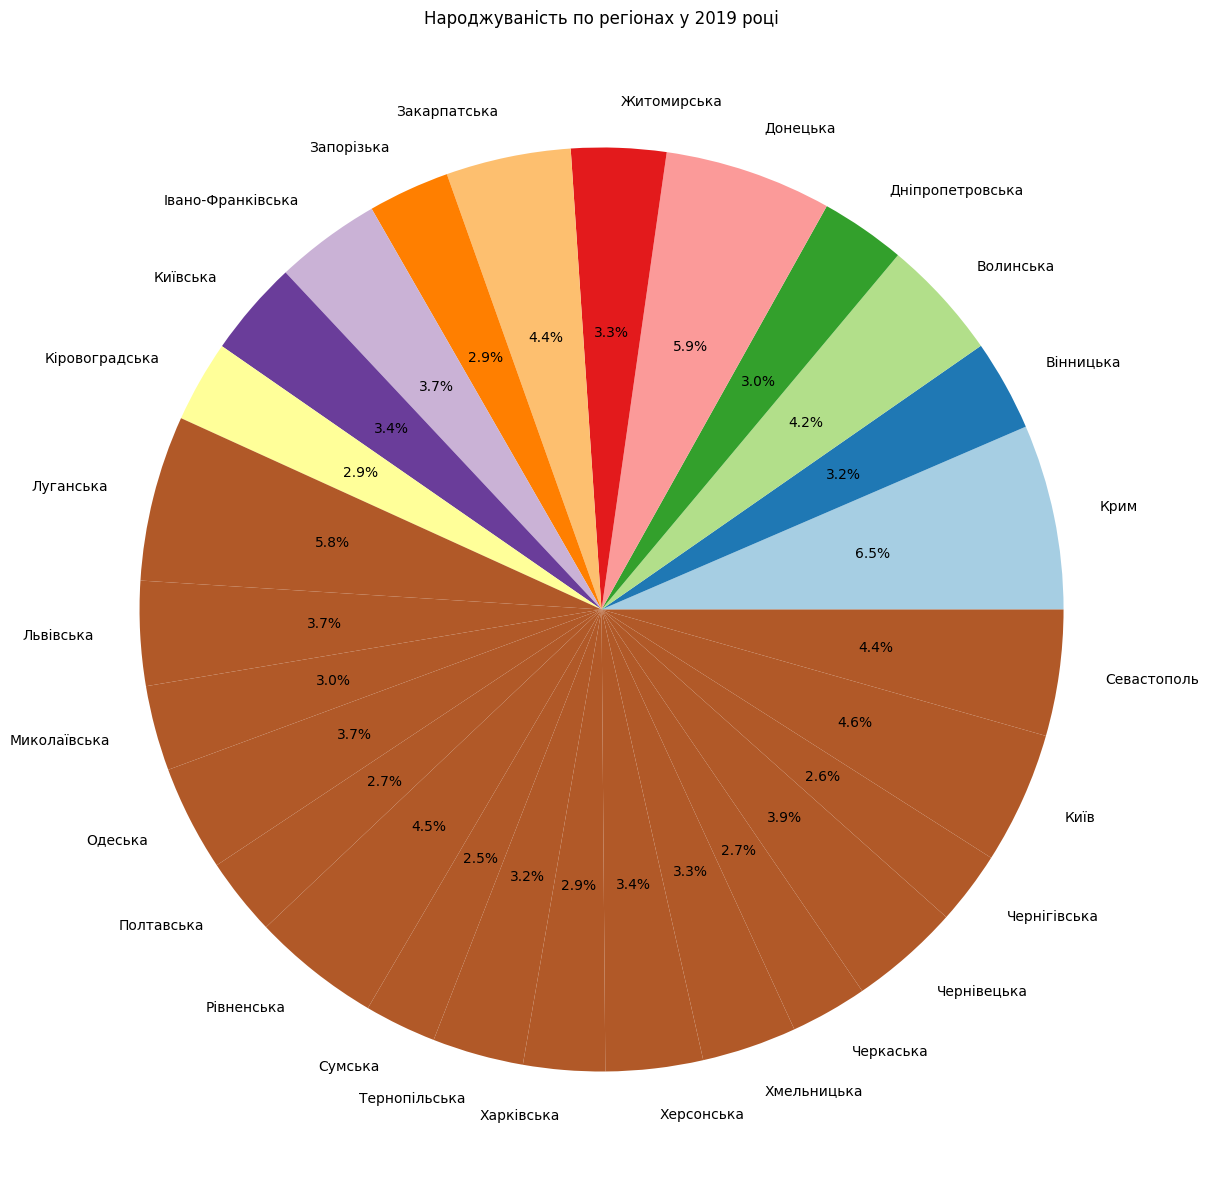

In [49]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.pie(data_2019['2019'], labels=data_2019['Регіон'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(data_2019))))
plt.title('Народжуваність по регіонах у 2019 році')
plt.show()